#**Exploring relations within a Global Suicide Rates dataset**

In [1]:
from google.colab import drive
drive.mount("/content/drive/", force_remount=True)

Mounted at /content/drive/


##**Importing Libraries**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

##**Loading Dataset**

Dataset Download Link: [https://www.kaggle.com/datasets/russellyates88/suicide-rates-overview-1985-to-2016](https://www.kaggle.com/datasets/russellyates88/suicide-rates-overview-1985-to-2016)

In [3]:
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/master.csv")

In [4]:
data

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers
...,...,...,...,...,...,...,...,...,...,...,...,...
27815,Uzbekistan,2014,female,35-54 years,107,3620833,2.96,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation X
27816,Uzbekistan,2014,female,75+ years,9,348465,2.58,Uzbekistan2014,0.675,"63,067,077,179",2309,Silent
27817,Uzbekistan,2014,male,5-14 years,60,2762158,2.17,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation Z
27818,Uzbekistan,2014,female,5-14 years,44,2631600,1.67,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation Z


##**Descriptive Statistics**


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             27820 non-null  object 
 1   year                27820 non-null  int64  
 2   sex                 27820 non-null  object 
 3   age                 27820 non-null  object 
 4   suicides_no         27820 non-null  int64  
 5   population          27820 non-null  int64  
 6   suicides/100k pop   27820 non-null  float64
 7   country-year        27820 non-null  object 
 8   HDI for year        8364 non-null   float64
 9    gdp_for_year ($)   27820 non-null  object 
 10  gdp_per_capita ($)  27820 non-null  int64  
 11  generation          27820 non-null  object 
dtypes: float64(2), int64(4), object(6)
memory usage: 2.5+ MB


In [6]:
data.describe()

,year,suicides_no,population,suicides/100k pop,HDI for year,gdp_per_capita ($)
count,27820.000000,27820.000000,2.782000e+04,27820.000000,8364.000000,27820.000000
mean,2001.258375,242.574407,1.844794e+06,12.816097,0.776601,16866.464414
std,8.469055,902.047917,3.911779e+06,18.961511,0.093367,18887.576472
min,1985.000000,0.000000,2.780000e+02,0.000000,0.483000,251.000000
25%,1995.000000,3.000000,9.749850e+04,0.920000,0.713000,3447.000000
50%,2002.000000,25.000000,4.301500e+05,5.990000,0.779000,9372.000000
75%,2008.000000,131.000000,1.486143e+06,16.620000,0.855000,24874.000000
max,2016.000000,22338.000000,4.380521e+07,224.970000,0.944000,126352.000000


In [7]:
data.nunique()

country                 101
year                     32
sex                       2
age                       6
suicides_no            2084
population            25564
suicides/100k pop      5298
country-year           2321
HDI for year            305
 gdp_for_year ($)      2321
gdp_per_capita ($)     2233
generation                6
dtype: int64

##**Bar Chart: Total Suicides by Country**

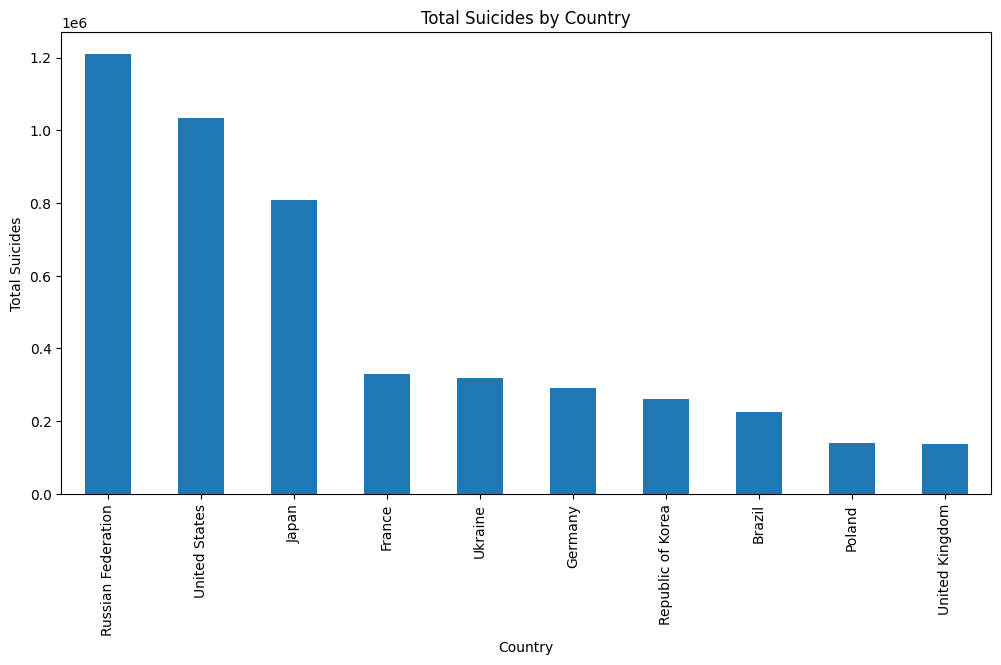

In [8]:
# Bar chart function
def plot_total_suicides_by_country(df):
    suicides_by_country = df.groupby('country')['suicides_no'].sum().sort_values(ascending=False).head(10)
    suicides_by_country.plot(kind='bar', figsize=(12, 6))
    plt.title('Total Suicides by Country')
    plt.xlabel('Country')
    plt.ylabel('Total Suicides')
    plt.show()

plot_total_suicides_by_country(data)


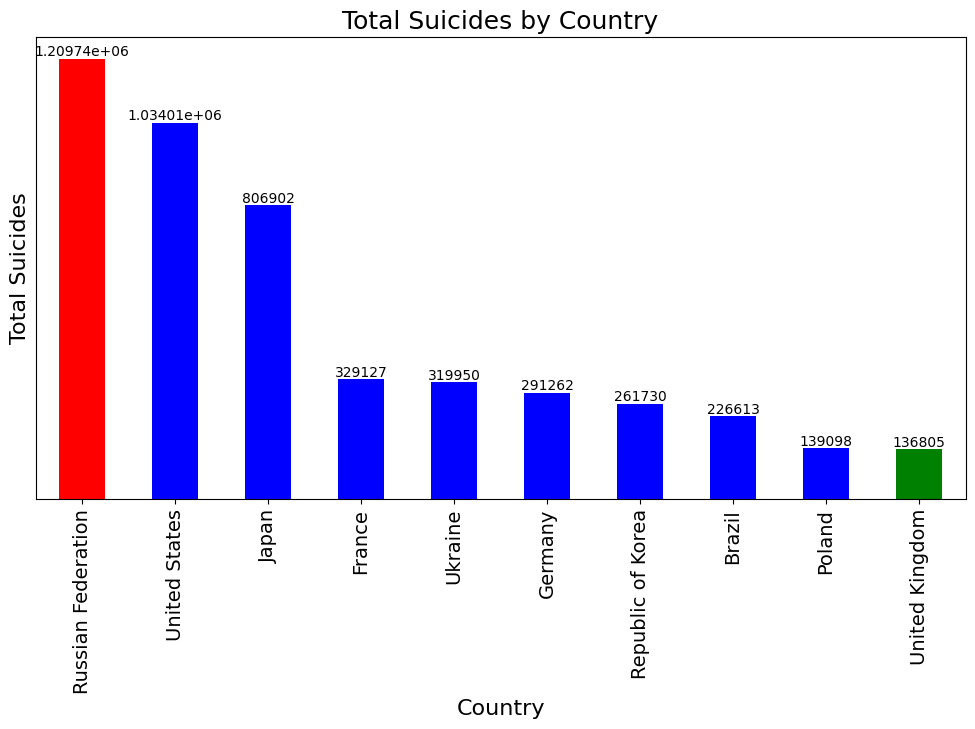

In [9]:
def plot_total_suicides_by_country(df):
    suicides_by_country = df.groupby('country')['suicides_no'].sum().sort_values(ascending=False).head(10)

    # Identify the highest and lowest suicide rates
    highest_idx = suicides_by_country.idxmax()
    lowest_idx = suicides_by_country.idxmin()

    # Set colors for the bars
    colors = ['blue'] * len(suicides_by_country)
    colors[suicides_by_country.index.get_loc(highest_idx)] = 'red'
    colors[suicides_by_country.index.get_loc(lowest_idx)] = 'green'

    ax = suicides_by_country.plot(kind='bar', figsize=(12, 6), color=colors)
    plt.title('Total Suicides by Country', fontsize=18)
    plt.xlabel('Country', fontsize=16)
    plt.ylabel('Total Suicides', fontsize=16)

    # Set x-axis tick font size
    plt.xticks(fontsize=14)

    # Hide y-axis ticks
    plt.gca().yaxis.set_ticks([])

    # Show values on bars
    for container in ax.containers:
        ax.bar_label(container)

    plt.show()

# Assuming 'data' is your DataFrame
plot_total_suicides_by_country(data)



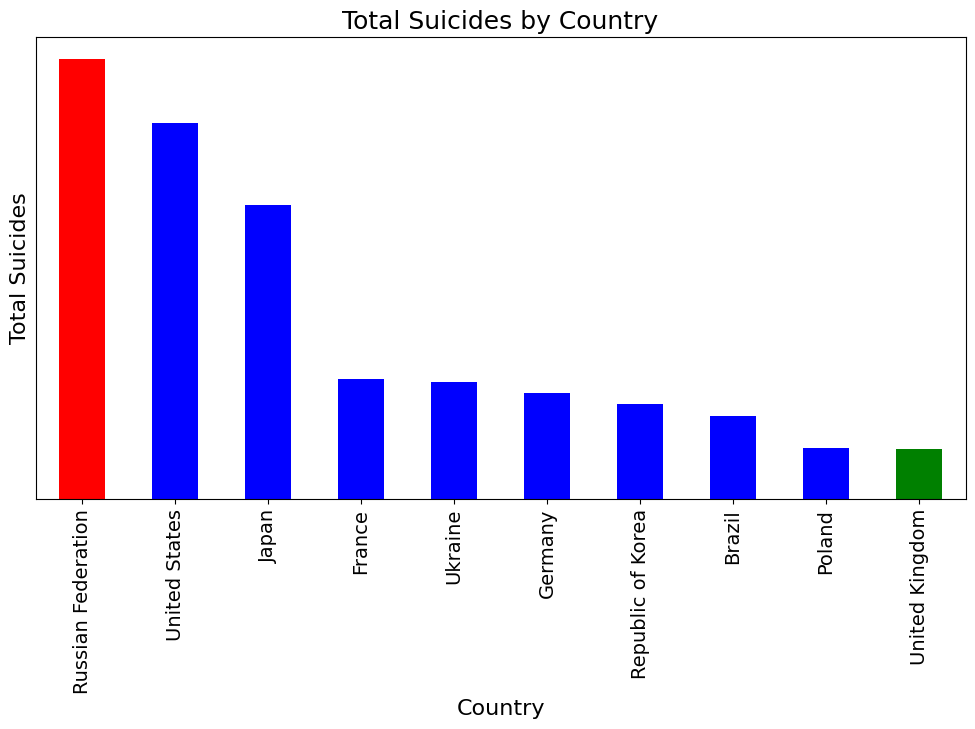

In [10]:
def plot_total_suicides_by_country(df):
    suicides_by_country = df.groupby('country')['suicides_no'].sum().sort_values(ascending=False).head(10)

    # Identify the highest and lowest suicide rates
    highest_idx = suicides_by_country.idxmax()
    lowest_idx = suicides_by_country.idxmin()

    # Set colors for the bars
    colors = ['blue'] * len(suicides_by_country)
    colors[suicides_by_country.index.get_loc(highest_idx)] = 'red'
    colors[suicides_by_country.index.get_loc(lowest_idx)] = 'green'

    ax = suicides_by_country.plot(kind='bar', figsize=(12, 6), color=colors)
    plt.title('Total Suicides by Country', fontsize=18)
    plt.xlabel('Country', fontsize=16)
    plt.ylabel('Total Suicides', fontsize=16)

    # Set x-axis tick font size
    plt.xticks(fontsize=14)

    # Hide y-axis ticks
    plt.gca().yaxis.set_ticks([])

    plt.show()

# Assuming 'data' is your DataFrame
plot_total_suicides_by_country(data)


##**Line Graph: Trend of Suicides Over the Years**

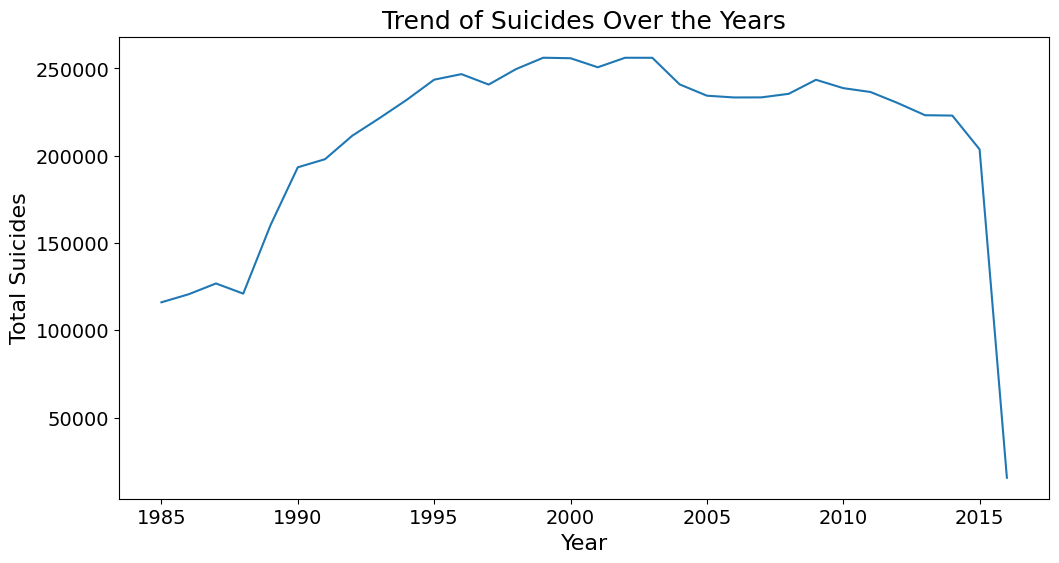

In [11]:
# Line graph function
def plot_suicide_trend_over_years(df):
    suicides_over_years = df.groupby('year')['suicides_no'].sum()
    plt.figure(figsize=(12, 6))
    suicides_over_years.plot(kind='line')
    plt.title('Trend of Suicides Over the Years', fontsize=18)
    plt.xlabel('Year', fontsize=16)
    plt.ylabel('Total Suicides', fontsize=16)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    plt.show()

plot_suicide_trend_over_years(data)


##**Box plot: Distribution of Suicides by Age Group**

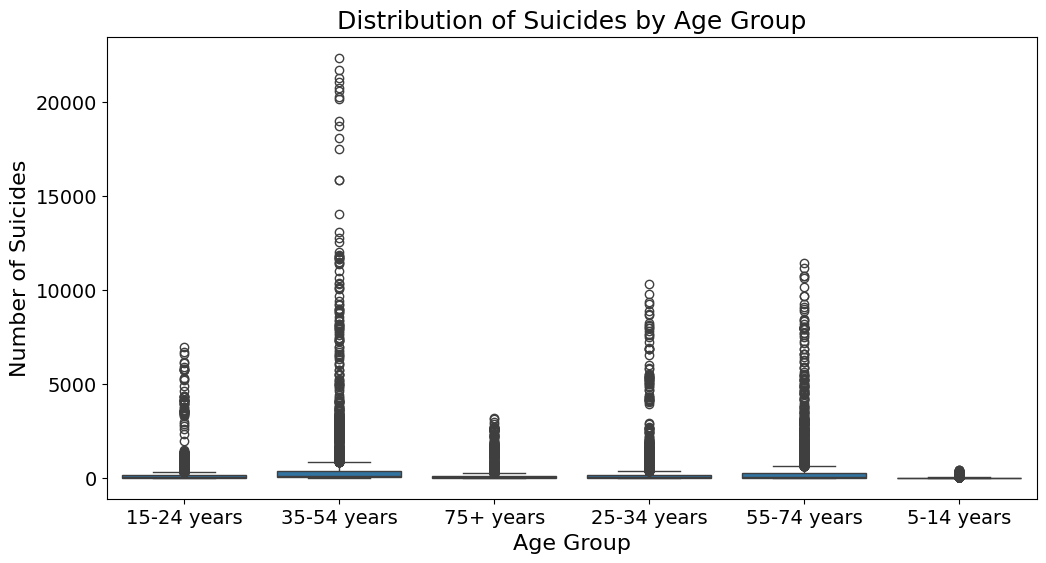

In [12]:
# Box plot function
def plot_suicides_by_age_group(df):
    plt.figure(figsize=(12, 6))
    sns.boxplot(x='age', y='suicides_no', data=df)
    plt.title('Distribution of Suicides by Age Group', fontsize=18)
    plt.xlabel('Age Group', fontsize=16)
    plt.ylabel('Number of Suicides', fontsize=16)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    plt.show()

plot_suicides_by_age_group(data)


##**Strip plot: Distribution of Suicides by Age Group**

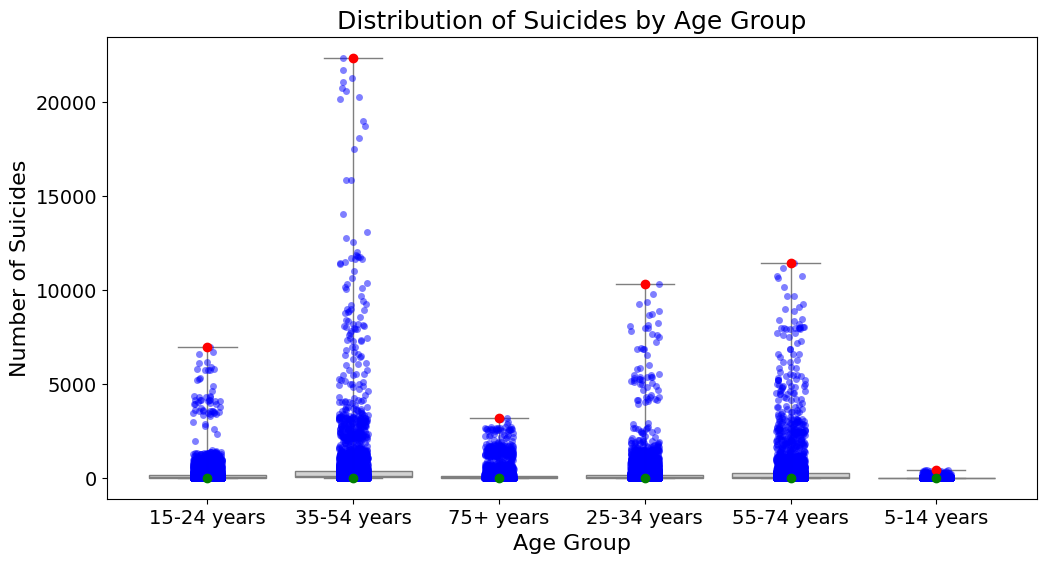

In [13]:
def plot_suicides_by_age_group_strip(df):
    plt.figure(figsize=(12, 6))

    # Create the box plot
    sns.boxplot(x='age', y='suicides_no', data=df, whis=np.inf, color='lightgray')

    # Create the strip plot
    sns.stripplot(x='age', y='suicides_no', data=df, jitter=True, color='blue', alpha=0.5)

    # Get the maximum and minimum values for each age group
    age_groups = df['age'].unique()
    for age_group in age_groups:
        group_data = df[df['age'] == age_group]['suicides_no']
        max_value = group_data.max()
        min_value = group_data.min()

        # Highlight the maximum values in red
        plt.scatter([age_group], [max_value], color='red', zorder=5)

        # Highlight the minimum values in green
        plt.scatter([age_group], [min_value], color='green', zorder=5)

    plt.title('Distribution of Suicides by Age Group', fontsize=18)
    plt.xlabel('Age Group', fontsize=16)
    plt.ylabel('Number of Suicides', fontsize=16)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    plt.show()

# Assuming 'data' is your DataFrame
plot_suicides_by_age_group_strip(data)



##**Correlation Matrix**

To understand the relationships between numerical variables, we use the corr() method to calculate the correlation matrix.

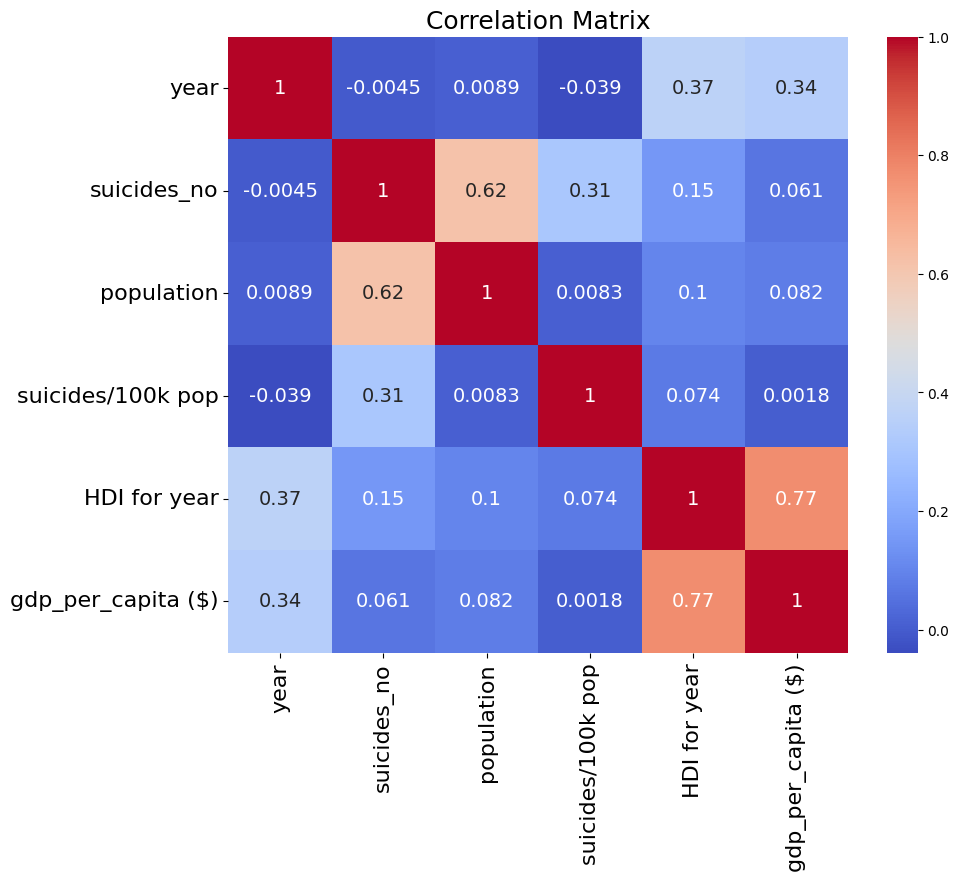

In [14]:
# Selecting numeric columns only
numeric_data = data.select_dtypes(include=[np.number])

# Correlation matrix
correlation_matrix = numeric_data.corr()

# Plotting the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', annot_kws={"size": 14})
plt.title('Correlation Matrix', fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()
plt.show()
